## 1. Extração dos Dados

In [2]:
# importação do base de dados diretamente do git hub do teste 
import requests
import pandas as pd
url = 'https://raw.githubusercontent.com/fabiopimentel21/desafio-fadesp-processo-seletivo/master/data/dataset_desafio_fadesp.csv'
base_dados_do_teste = pd.read_csv(url, encoding='latin1') # foi encontrado uma dificuldade na leitura do arquivo -> latin-1 ou ISO-8859-1, comum em arquivos em português (por causa dos acentos)

## 1.2 Extração da Base de Metadados

In [3]:
# importação dos metadados para analise da base completa obs: foi indentificado que na base não se encontrava a nomeclatura de toda a base 
metadados_do_teste = pd.read_excel(r'C:\RPA\desafio_projetos\desafio_fadesp\desafio-fadesp-processo-seletivo\metadata.xlsx')

## 1.3 Visualização dos Metadados

In [4]:
#visualizando metadados
metadados_do_teste.head()


,Coluna,Descrição
0,Row ID,ID do registro
1,Order ID,Identificação do pedido
2,Order Date,Data do pedido
3,Ship Date,Data de envio do pedido
4,Ship Mode,Modo de envio do pedido


## 1.4 Visualização da Base de Vendas

In [5]:
# visualização da base para primeiras analises
base_dados_do_teste

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.70,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,32593,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,...,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium
51286,47594,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,...,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium
51287,8857,MX-2014-110527,31-12-2014,2/1/2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,...,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium
51288,6852,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,...,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium


## 1.5 Visualização das Culunas do DF

In [6]:
# visualização das colunas do df do teste 
base_dados_do_teste.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

# 2 Limpeza dos Dados -> Iniciando a limpeza dos dados -> Objetivo: Valores nulos, Dados inconsistentes e Dados duplicados 

## 2.1 Tradução das Colunas 

In [7]:
# tradução das colunas para facilitar analise 
base_dados_do_teste = base_dados_do_teste.rename(columns={
    'Row ID': 'ID da Linha',
    'Order ID': 'ID do Pedido',
    'Order Date': 'Data do Pedido',
    'Ship Date': 'Data de Envio',
    'Ship Mode': 'Modalidade de Envio',
    'Customer ID': 'ID do Cliente',
    'Customer Name': 'Nome do Cliente',
    'Segment': 'Segmento',
    'City': 'Cidade',
    'State': 'Estado',
    'Country': 'País',
    'Postal Code': 'Código Postal',
    'Market': 'Mercado',
    'Region': 'Região',
    'Product ID': 'ID do Produto',
    'Category': 'Categoria',
    'Sub-Category': 'Subcategoria',
    'Product Name': 'Nome do Produto',
    'Sales': 'Vendas',
    'Quantity': 'Quantidade',
    'Discount': 'Desconto',
    'Profit': 'Lucro',
    'Shipping Cost': 'Custo de Envio',
    'Order Priority': 'Prioridade do Pedido'
})

base_dados_do_teste.columns


Index(['ID da Linha', 'ID do Pedido', 'Data do Pedido', 'Data de Envio',
       'Modalidade de Envio', 'ID do Cliente', 'Nome do Cliente', 'Segmento',
       'Cidade', 'Estado', 'País', 'Código Postal', 'Mercado', 'Região',
       'ID do Produto', 'Categoria', 'Subcategoria', 'Nome do Produto',
       'Vendas', 'Quantidade', 'Desconto', 'Lucro', 'Custo de Envio',
       'Prioridade do Pedido'],
      dtype='object')

## 2.2 Ultilizando describe() para ter uma noção inicial Eatatistica do DF

In [8]:
# ultilizando describe() para ter uma noção inicial do df obs: futuras comparações 
base_dados_do_teste.describe()

,ID da Linha,Código Postal,Vendas,Quantidade,Desconto,Lucro,Custo de Envio
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


## 2.3 Buscando Valores nulos

In [9]:
# verificando a qtd de valores nulos em cada coluna
base_dados_do_teste.isnull().sum()

ID da Linha                 0
ID do Pedido                0
Data do Pedido              0
Data de Envio               0
Modalidade de Envio         0
ID do Cliente               0
Nome do Cliente             0
Segmento                    0
Cidade                      0
Estado                      0
País                        0
Código Postal           41296
Mercado                     0
Região                      0
ID do Produto               0
Categoria                   0
Subcategoria                0
Nome do Produto             0
Vendas                      0
Quantidade                  0
Desconto                    0
Lucro                       0
Custo de Envio              0
Prioridade do Pedido        0
dtype: int64

## 2.4 Número de Linhas do DF

In [10]:
# visualizando número de linhas do df para comparação com números de nulos
numero_linhas = base_dados_do_teste.shape[0]
print(numero_linhas)

51290


## 2.5 Número de Linhas Nulas

In [11]:
# visualização de nulos
nulos_codigo_postal = base_dados_do_teste['Código Postal'].isnull().sum()

In [12]:
# observação da coluna 
print(base_dados_do_teste['Código Postal'])

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
51285    94533.0
51286        NaN
51287        NaN
51288        NaN
51289    80538.0
Name: Código Postal, Length: 51290, dtype: float64


## 2.6 Verificando a Porcentagem de Valores Nulos em Referência ao Total de Linhas


In [13]:
# verificando a % de valores nulos na coluna codigo posta em referência ao total de linhas
#  obs: analise de possivél drop da coluna
porcentagem_de_nulos = (nulos_codigo_postal / numero_linhas) * 100
print(porcentagem_de_nulos)

80.51472021836615


## OBS: A coluna 'Código Postal' foi excluída devido à alta proporção de valores nulos e à redundância com outras variáveis geográficas como Estado, Cidade e País, que oferecem informações suficientes para a análise

## 2.7 Exclusão Da Coluna de Nulos

In [14]:
# exclusão da coluna
base_dados_do_teste.drop('Código Postal', axis=1, inplace=True)

In [15]:
# nova base com o drop
base_dados_do_teste.columns

Index(['ID da Linha', 'ID do Pedido', 'Data do Pedido', 'Data de Envio',
       'Modalidade de Envio', 'ID do Cliente', 'Nome do Cliente', 'Segmento',
       'Cidade', 'Estado', 'País', 'Mercado', 'Região', 'ID do Produto',
       'Categoria', 'Subcategoria', 'Nome do Produto', 'Vendas', 'Quantidade',
       'Desconto', 'Lucro', 'Custo de Envio', 'Prioridade do Pedido'],
      dtype='object')

In [16]:
#  confirmando nulos na nova base sem a coluna codigo postal
base_dados_do_teste.isnull().sum()

ID da Linha             0
ID do Pedido            0
Data do Pedido          0
Data de Envio           0
Modalidade de Envio     0
ID do Cliente           0
Nome do Cliente         0
Segmento                0
Cidade                  0
Estado                  0
País                    0
Mercado                 0
Região                  0
ID do Produto           0
Categoria               0
Subcategoria            0
Nome do Produto         0
Vendas                  0
Quantidade              0
Desconto                0
Lucro                   0
Custo de Envio          0
Prioridade do Pedido    0
dtype: int64

## 2.7 Verificando Tipos de Dados

In [17]:
# visualizando informações do tipo de dados 
base_dados_do_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID da Linha           51290 non-null  int64  
 1   ID do Pedido          51290 non-null  object 
 2   Data do Pedido        51290 non-null  object 
 3   Data de Envio         51290 non-null  object 
 4   Modalidade de Envio   51290 non-null  object 
 5   ID do Cliente         51290 non-null  object 
 6   Nome do Cliente       51290 non-null  object 
 7   Segmento              51290 non-null  object 
 8   Cidade                51290 non-null  object 
 9   Estado                51290 non-null  object 
 10  País                  51290 non-null  object 
 11  Mercado               51290 non-null  object 
 12  Região                51290 non-null  object 
 13  ID do Produto         51290 non-null  object 
 14  Categoria             51290 non-null  object 
 15  Subcategoria       

## 2.8 Convertendo Dados Objetos para Data

In [18]:
# encontrar valores NÃO são convertidos para datetime
datas_invalidas = base_dados_do_teste[~pd.to_datetime(base_dados_do_teste['Data do Pedido'], dayfirst=True, errors='coerce').notna()]

print(datas_invalidas['Data do Pedido'])


20067    13-01-2011
20068    13-01-2011
20069    13-01-2011
20070    13-01-2011
20071    13-01-2011
            ...    
51285    31-12-2014
51286    31-12-2014
51287    31-12-2014
51288    31-12-2014
51289    31-12-2014
Name: Data do Pedido, Length: 31223, dtype: object


In [19]:
#convertendo valores 
base_dados_do_teste['Data do Pedido'] = pd.to_datetime(base_dados_do_teste['Data do Pedido'], format='%d-%m-%Y', errors='coerce')
base_dados_do_teste['Data de Envio'] = pd.to_datetime(base_dados_do_teste['Data de Envio'], format='%d-%m-%Y', errors='coerce')


In [20]:
# confirmação 
base_dados_do_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ID da Linha           51290 non-null  int64         
 1   ID do Pedido          51290 non-null  object        
 2   Data do Pedido        31223 non-null  datetime64[ns]
 3   Data de Envio         31456 non-null  datetime64[ns]
 4   Modalidade de Envio   51290 non-null  object        
 5   ID do Cliente         51290 non-null  object        
 6   Nome do Cliente       51290 non-null  object        
 7   Segmento              51290 non-null  object        
 8   Cidade                51290 non-null  object        
 9   Estado                51290 non-null  object        
 10  País                  51290 non-null  object        
 11  Mercado               51290 non-null  object        
 12  Região                51290 non-null  object        
 13  ID do Produto   

## 2.9 Vereficando Dados Duplicados

In [21]:
# dados duplicados Não encontrado
base_dados_do_teste.duplicated().sum()


0

## obs: sem dados duplicados

# 3 Iniciando Análise Exploratória (importando bibliotecas)

In [22]:
# importação da bibliotecas -> gráficos
import matplotlib.pyplot as plt  # mais controle dos graficos
import seaborn as sns # gráficos mais modernos

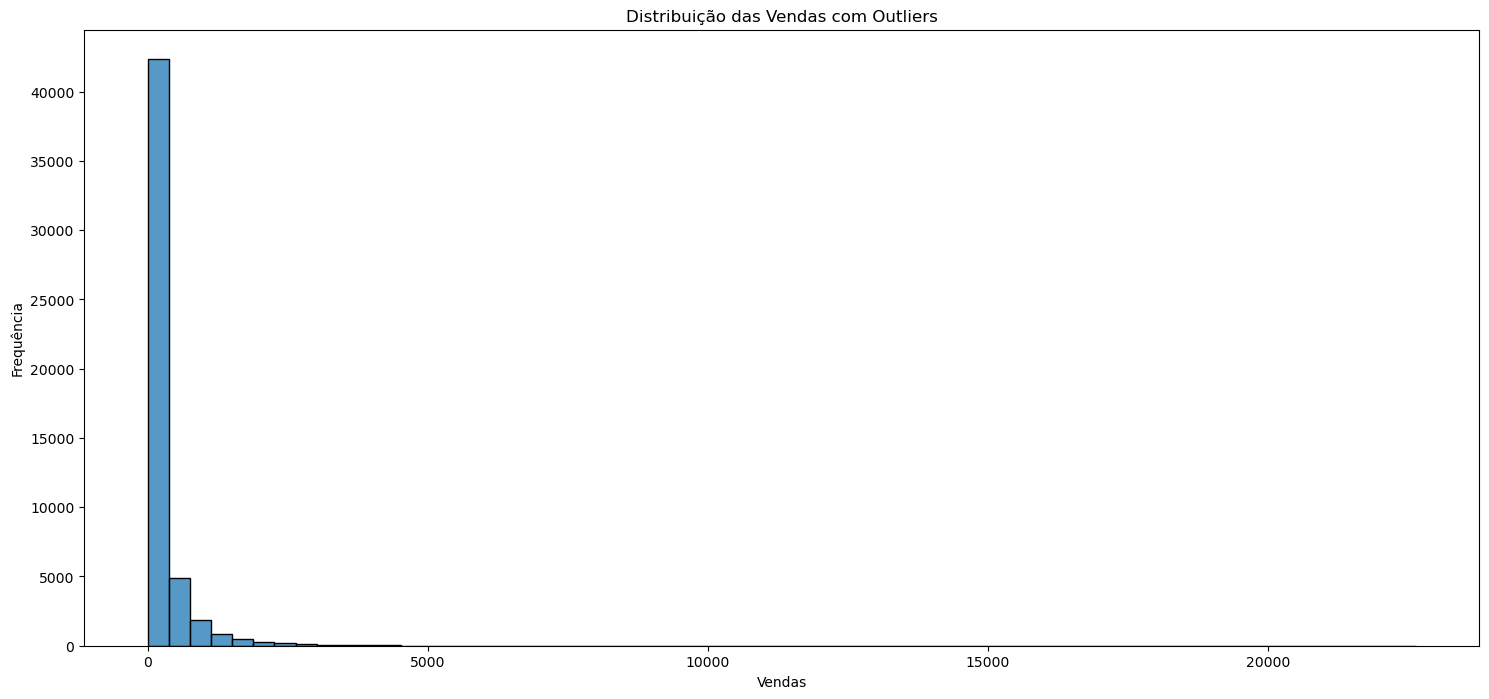

In [23]:
plt.figure(figsize=(18, 8))
sns.histplot(base_dados_do_teste['Vendas'], bins=60, kde=False)
plt.title('Distribuição das Vendas com Outliers')
plt.xlabel('Vendas')
plt.ylabel('Frequência')
plt.show()

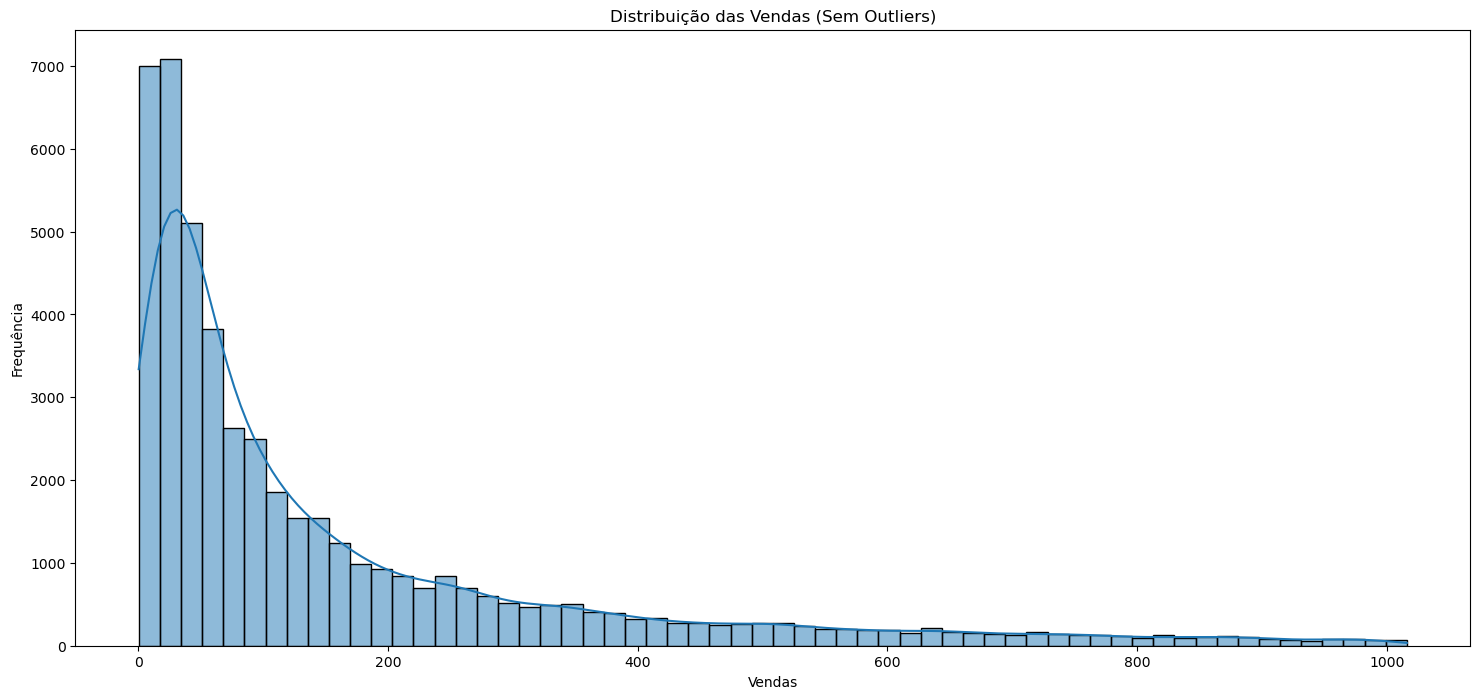

In [24]:
vendas_filtradas = base_dados_do_teste[base_dados_do_teste['Vendas'] < base_dados_do_teste['Vendas'].quantile(0.95)]

plt.figure(figsize=(18, 8))
sns.histplot(vendas_filtradas['Vendas'], bins=60, kde=True)  # KDE para suavizar a curva
plt.title('Distribuição das Vendas (Sem Outliers)')
plt.xlabel('Vendas')
plt.ylabel('Frequência')
plt.show()


In [25]:

outliers = base_dados_do_teste[base_dados_do_teste['Vendas'] >= base_dados_do_teste['Vendas'].quantile(0.95)]


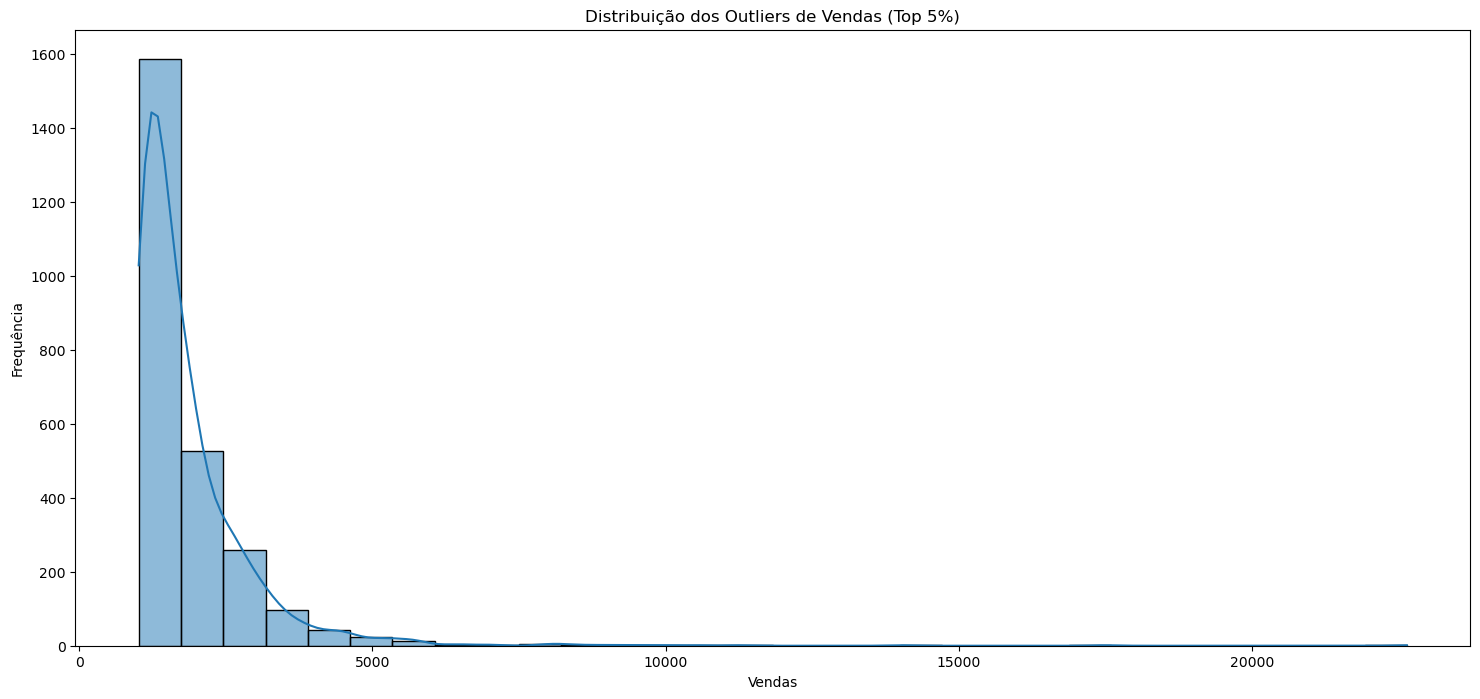

In [26]:
plt.figure(figsize=(18, 8))
sns.histplot(outliers['Vendas'], bins=30, kde=True)
plt.title('Distribuição dos Outliers de Vendas (Top 5%)')
plt.xlabel('Vendas')
plt.ylabel('Frequência')
plt.show()


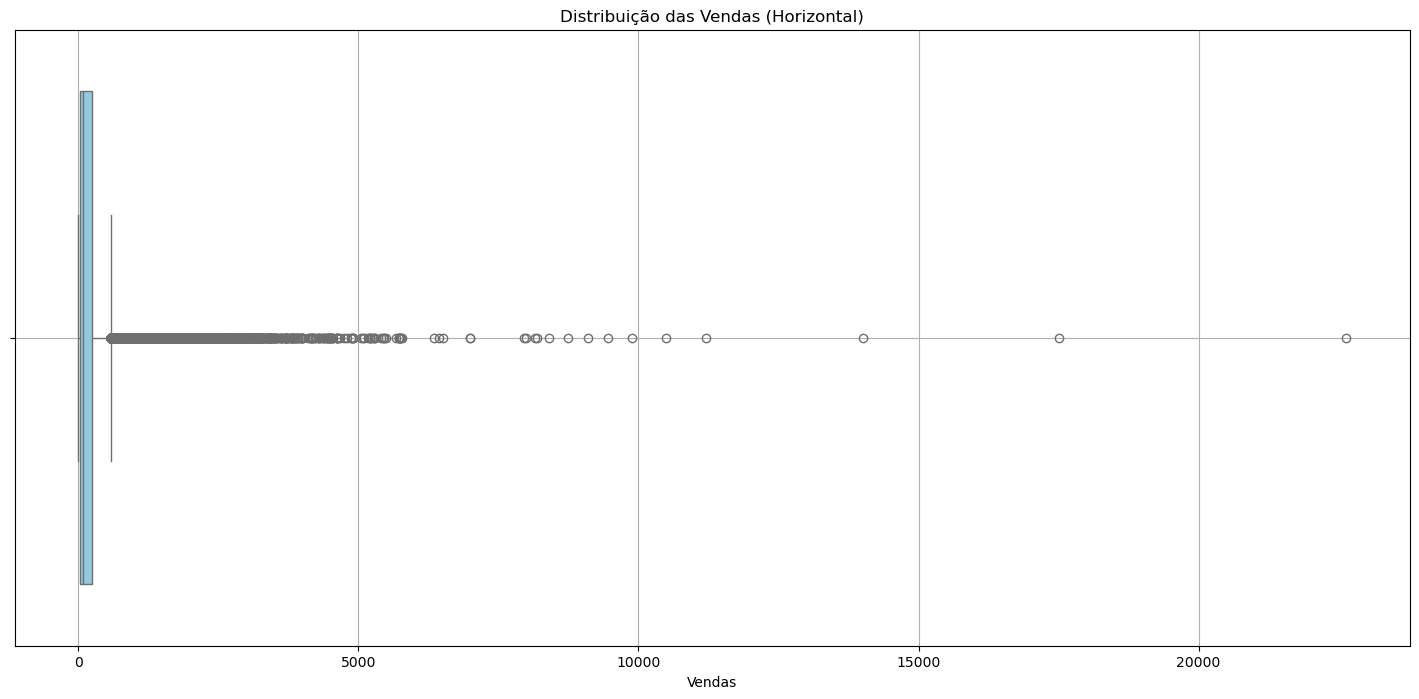

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 8))
sns.boxplot(x=base_dados_do_teste['Vendas'], color='skyblue')
plt.title('Distribuição das Vendas (Horizontal)')
plt.xlabel('Vendas')
plt.grid(True)
plt.show()



In [28]:
# Criar uma nova coluna: Tempo de Entrega em dias
base_dados_do_teste['Tempo de Entrega'] = (base_dados_do_teste['Data de Envio'] - base_dados_do_teste['Data do Pedido']).dt.days

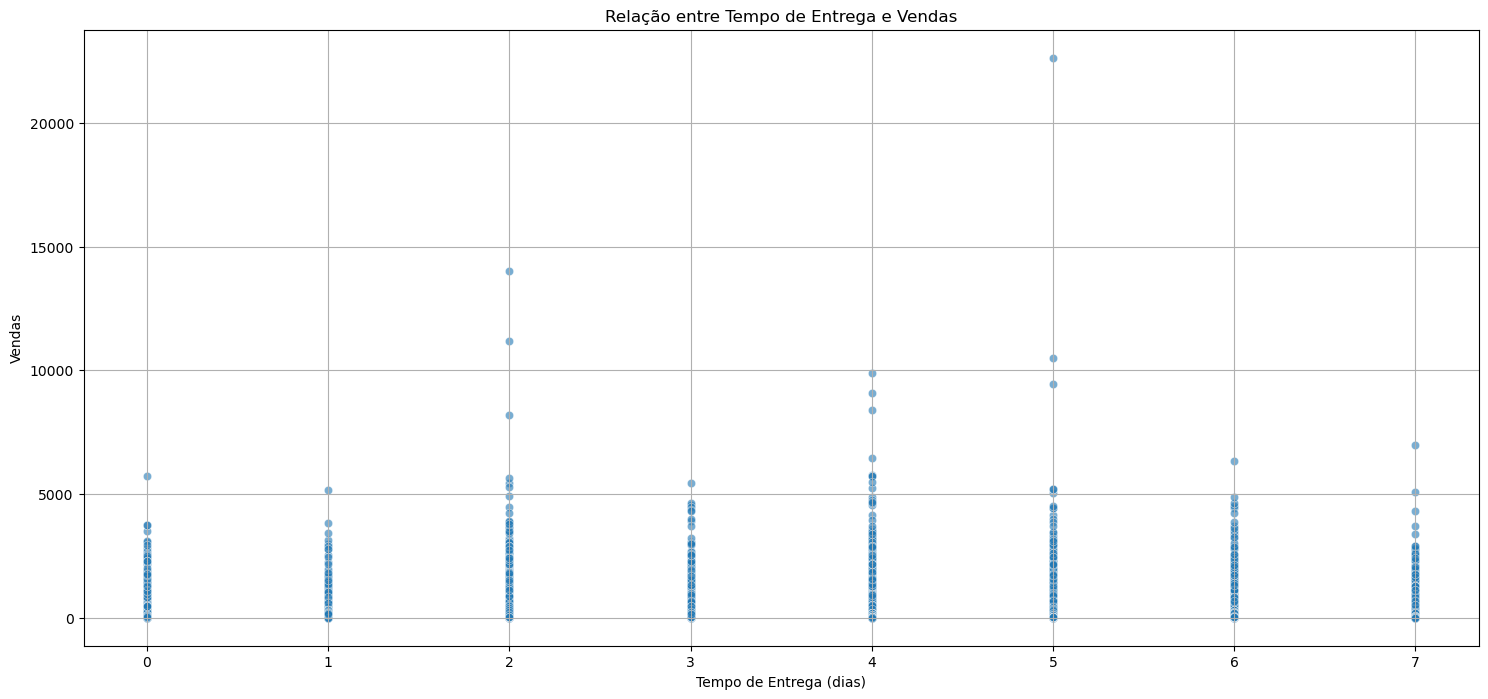

In [29]:
plt.figure(figsize=(18, 8))
sns.scatterplot(data=base_dados_do_teste, x='Tempo de Entrega', y='Vendas', alpha=0.6)
plt.title('Relação entre Tempo de Entrega e Vendas')
plt.xlabel('Tempo de Entrega (dias)')
plt.ylabel('Vendas')
plt.grid(True)
plt.show()


## 3.1 Agrupando por Produto e Top 10 Mais Vendidos 

In [30]:
# agrupando e somando as vendas
top_produtos = base_dados_do_teste.groupby('Nome do Produto')['Vendas'].sum().sort_values(ascending=False).head(10)

<Axes: title={'center': 'Top 10 Produtos Mais Vendidos'}, ylabel='Nome do Produto'>

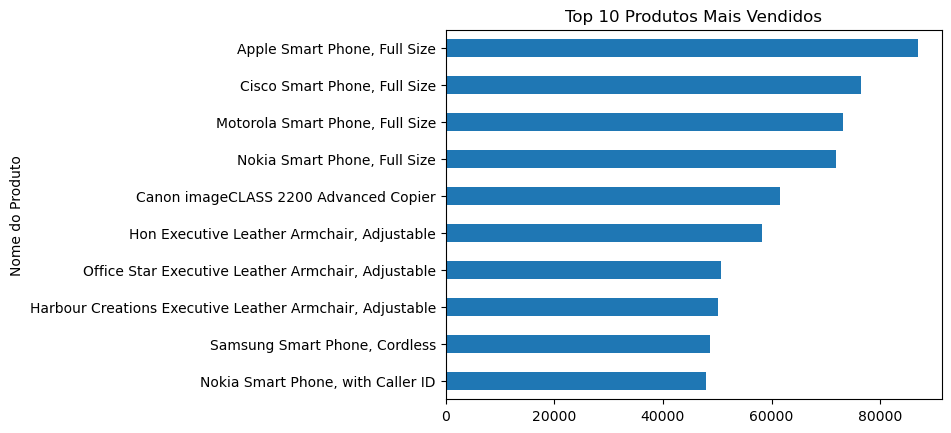

In [31]:
# visualizando os top 10 produtos
top_produtos.sort_values(ascending=True).plot(kind='barh', title='Top 10 Produtos Mais Vendidos')

## 3.3 Distribuição Geografica

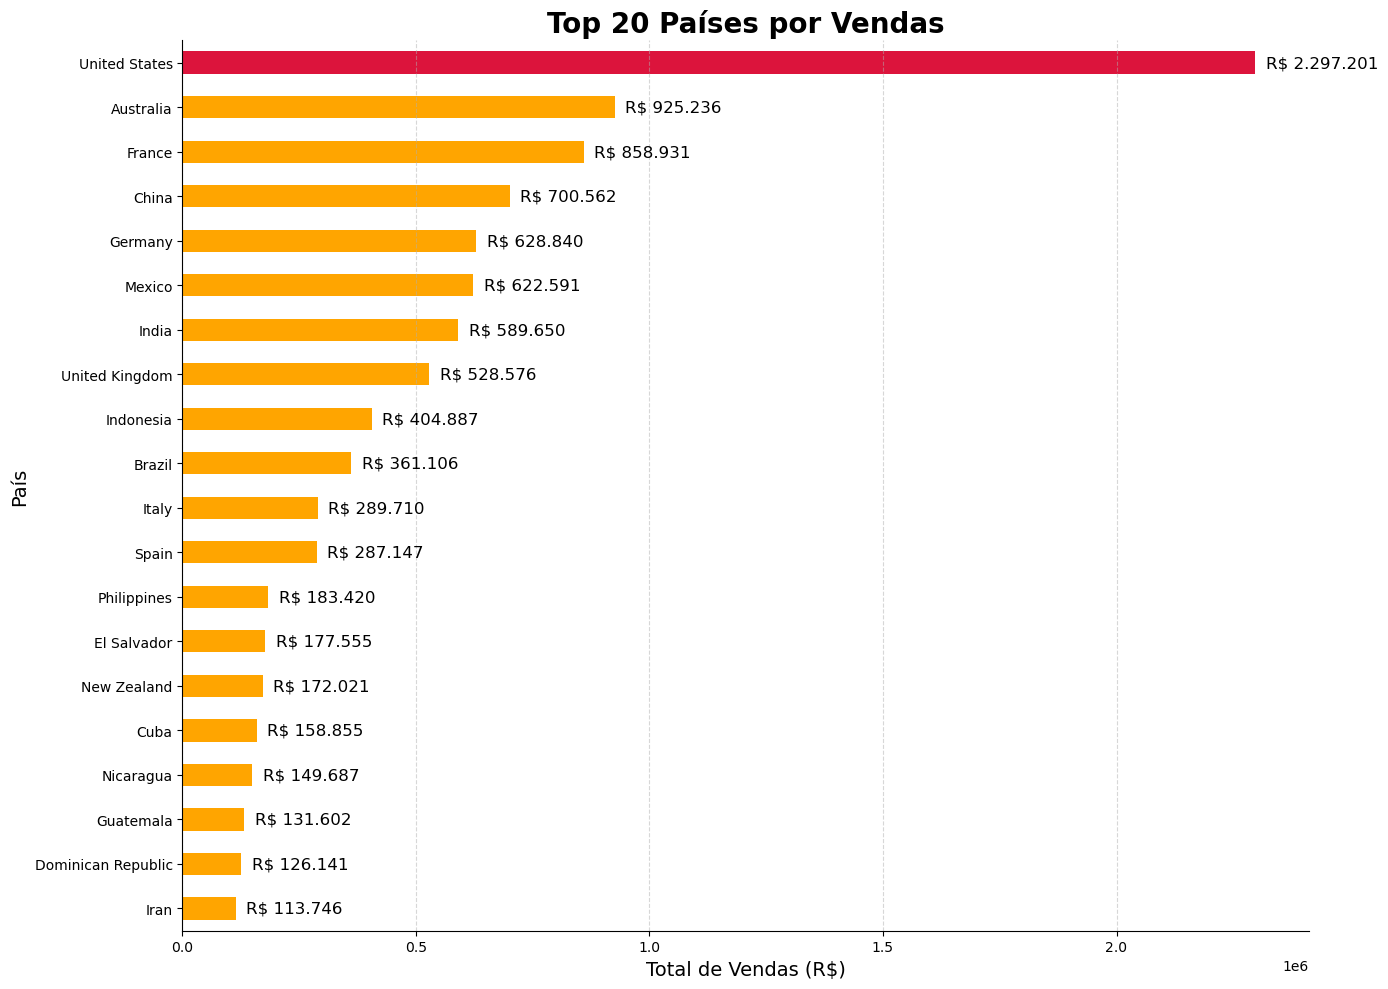

In [37]:
import matplotlib.pyplot as plt

# Agrupa os dados por país e soma as vendas
geo_sales_country = base_dados_do_teste.groupby('País')['Vendas'].sum().sort_values(ascending=True)

# Filtra os top 20 países com mais vendas
top_n = 20
geo_sales_country_top = geo_sales_country[-top_n:]

# Cria o gráfico horizontal
fig, ax = plt.subplots(figsize=(14, 10))
colors = ['crimson' if i == geo_sales_country_top.idxmax() else 'orange' for i in geo_sales_country_top.index]

geo_sales_country_top.plot(kind='barh', color=colors, ax=ax)

# Adiciona os valores formatados ao lado das barras
for i, (pais, valor) in enumerate(geo_sales_country_top.items()):
    ax.text(valor + geo_sales_country_top.max()*0.01, i, f'R$ {valor:,.0f}'.replace(',', 'X').replace('.', ',').replace('X', '.'), 
            va='center', fontsize=12)

# Títulos e ajustes visuais
ax.set_title(f'Top {top_n} Países por Vendas', fontsize=20, fontweight='bold')
ax.set_xlabel('Total de Vendas (R$)', fontsize=14)
ax.set_ylabel('País', fontsize=14)
ax.grid(axis='x', linestyle='--', alpha=0.5)
ax.spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()


In [ ]:
correlacao = base_dados_do_teste[['Vendas', 'Desconto']].corr()
print(correlacao)


            Vendas  Desconto
Vendas    1.000000 -0.086722
Desconto -0.086722  1.000000


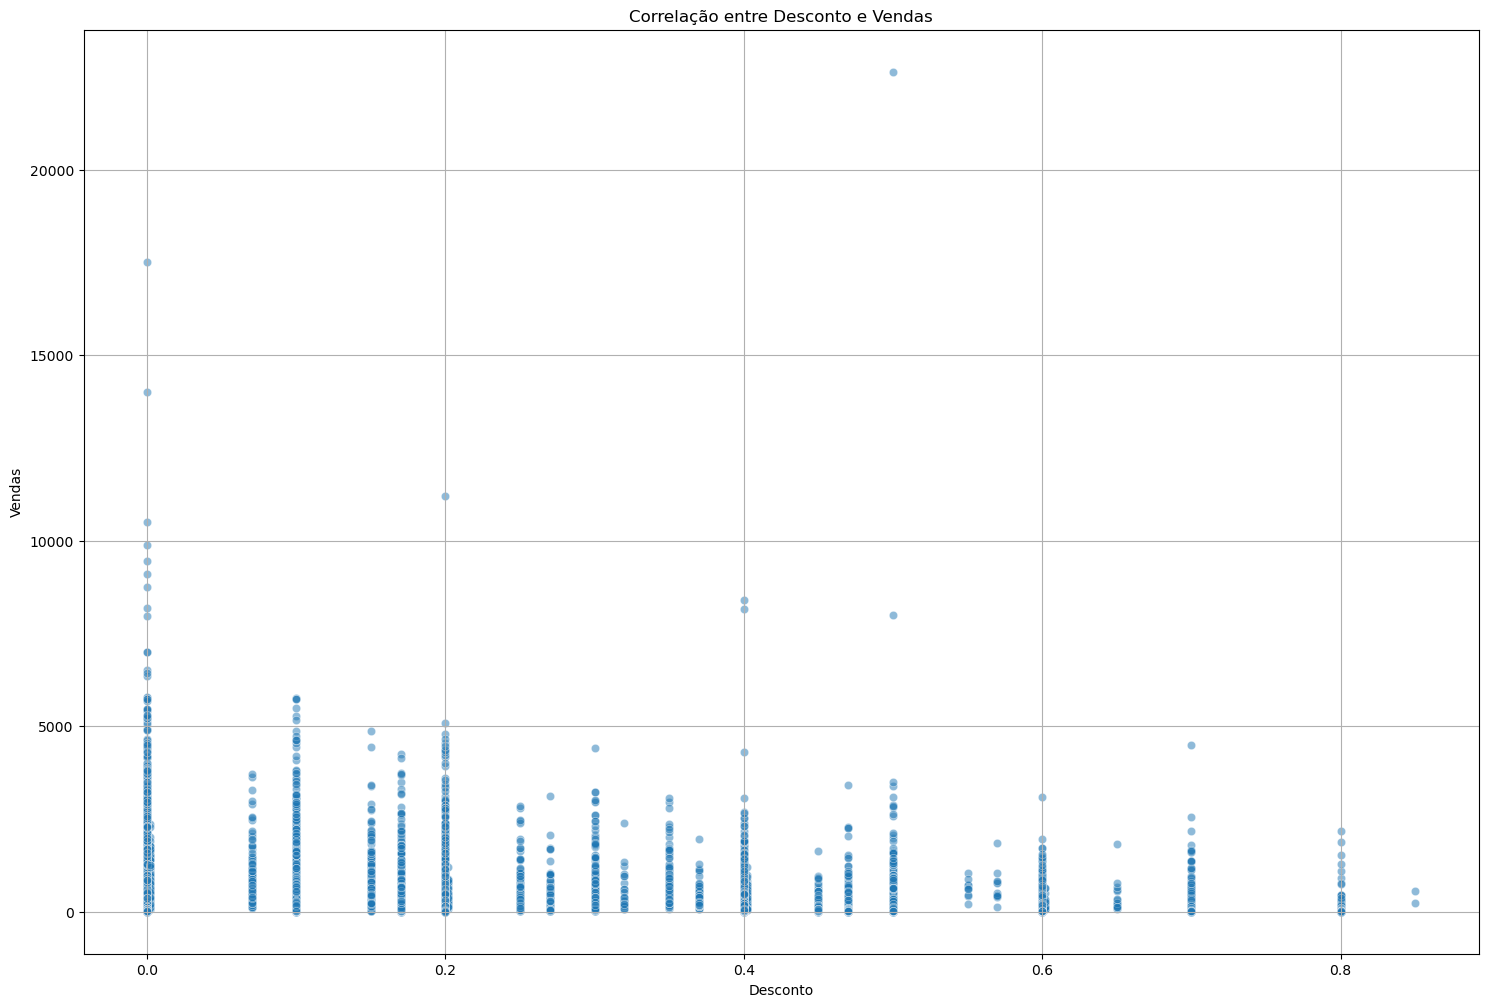

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 12))
sns.scatterplot(data=base_dados_do_teste, x='Desconto', y='Vendas', alpha=0.5)
plt.title('Correlação entre Desconto e Vendas')
plt.xlabel('Desconto')
plt.ylabel('Vendas')
plt.grid(True)
plt.show()


In [ ]:
# Agrupar as vendas por mês
vendas_mensais = base_dados_do_teste.groupby(base_dados_do_teste['Data do Pedido'].dt.to_period('M'))['Vendas'].sum().reset_index()
vendas_mensais['Data do Pedido'] = vendas_mensais['Data do Pedido'].dt.to_timestamp()


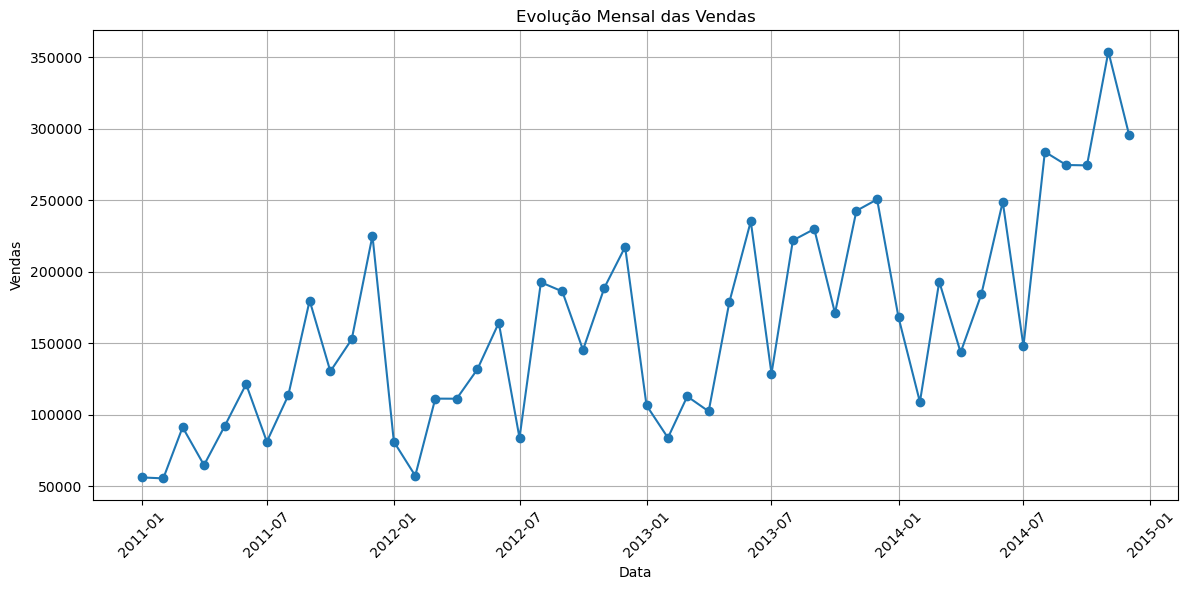

In [ ]:
import matplotlib.pyplot as plt

# Exemplo para vendas mensais
plt.figure(figsize=(12, 6))
plt.plot(vendas_mensais['Data do Pedido'], vendas_mensais['Vendas'], marker='o')
plt.title('Evolução Mensal das Vendas')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [38]:
from scipy.stats import ttest_ind

grupo_com_desc = base_dados_do_teste[base_dados_do_teste['Desconto'] > 0]['Lucro']
grupo_sem_desc = base_dados_do_teste[base_dados_do_teste['Desconto'] == 0]['Lucro']

stat, p_valor = ttest_ind(grupo_com_desc, grupo_sem_desc, equal_var=False)

print(f'p-valor: {p_valor}')
if p_valor < 0.05:
    print("Rejeitamos H0: O desconto afeta o lucro.")
else:
    print("Não rejeitamos H0: O desconto não afeta o lucro.")


p-valor: 0.0
Rejeitamos H0: O desconto afeta o lucro.
